# GERMANY - Uppgift 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

olympics = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [4]:
germany = olympics[olympics['NOC'] == 'GER'].copy()

germany['Name'] = germany['Name'].apply(
    lambda x:
        hashlib.sha256(x.encode()).hexdigest()
)
germany = germany.rename(columns={'Name' : 'Hash_Names'}).reset_index(drop=True)
germany.head()

,ID,Hash_Names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,133,341116996c59575b8e0a66ad3d42f5063c72c9d5fd8840...,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
2,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
3,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
4,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN


In [5]:
german_medals = germany[(germany["Medal"].notna())]
medals_per_sport = german_medals.groupby("Sport")["Medal"].count().reset_index()
top10 = medals_per_sport.sort_values(by='Medal', ascending= False).reset_index(drop=True).head(10)

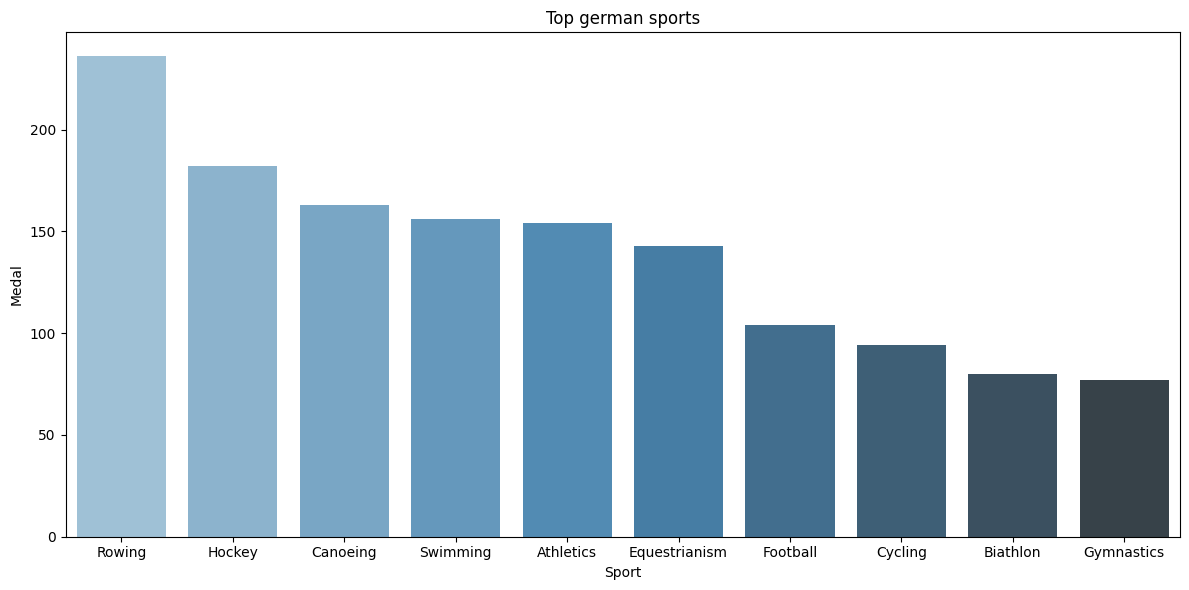

In [6]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x = 'Sport', y = 'Medal', hue='Sport', palette='Blues_d')
plt.title('Top german sports')
plt.tight_layout()

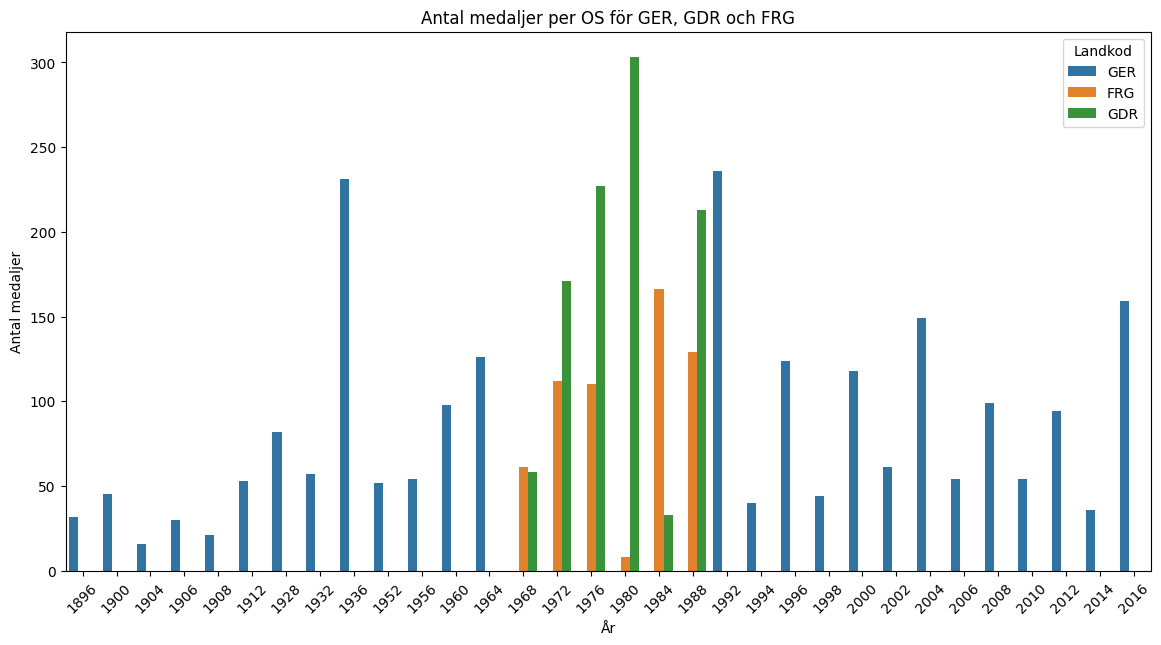

In [7]:
germany_all = olympics[(olympics["NOC"].isin(["GER", "GDR", "FRG"])) & (olympics["Medal"].notna())]

medals_breakdown = germany_all.groupby(["Year", "NOC"])["Medal"].count().reset_index()

plt.figure(figsize = (14,7))
sns.barplot(data=medals_breakdown, x = "Year", y = "Medal", hue = "NOC")
plt.title("Antal medaljer per OS för GER, GDR och FRG")
plt.ylabel("Antal medaljer")
plt.xlabel("År")
plt.xticks(rotation = 45)
plt.legend(title="Landkod")
plt.show()

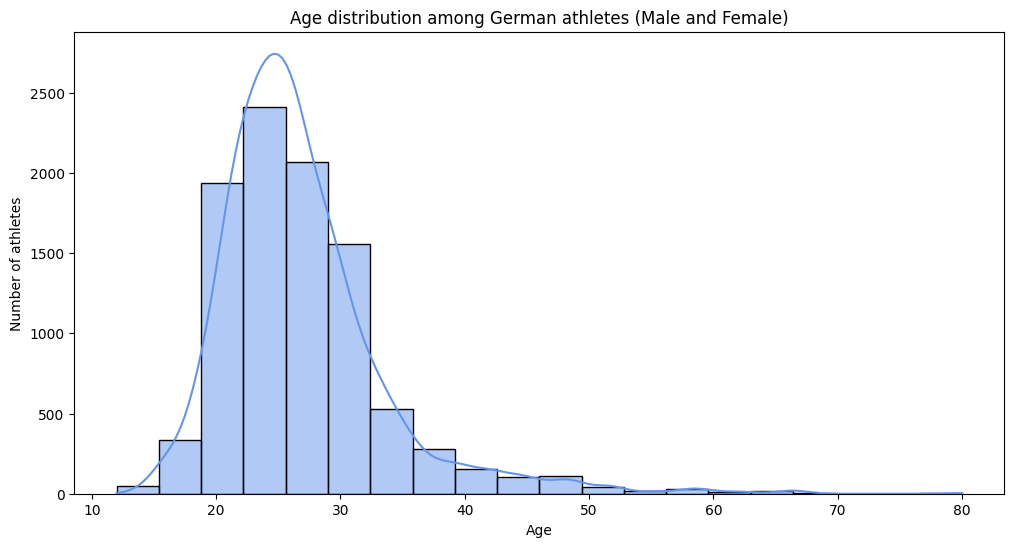

In [8]:
germany_age = germany[germany['Age'].notna()]

plt.figure(figsize=(12,6))
sns.histplot(data=germany_age, x='Age', bins=20, kde=True, color='cornflowerblue')
plt.title('Age distribution among German athletes (Male and Female)')
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.show()

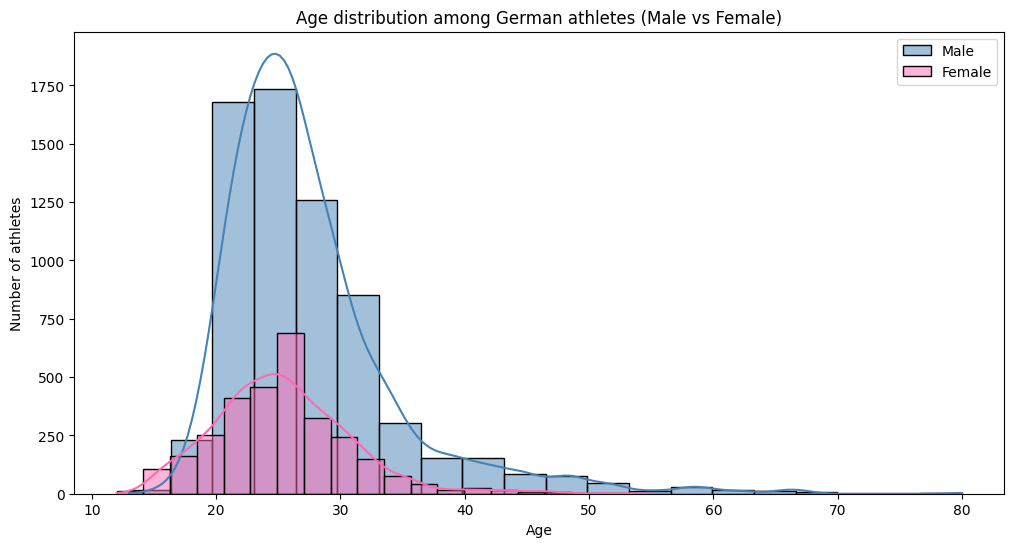

In [9]:
# personal note: alpha gör staplarna genomskinliga så man kan se båda samtidigt

plt.figure(figsize=(12,6))
sns.histplot(data=germany_age[germany_age['Sex'] == 'M'], x='Age', bins=20, kde=True, color='steelblue', label='Male', alpha=0.5)
sns.histplot(data=germany_age[germany_age['Sex'] == 'F'], x='Age', bins=20, kde=True, color='hotpink', label='Female', alpha=0.5)
plt.title('Age distribution among German athletes (Male vs Female)')
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.legend()
plt.show()